# Word Clouds and Topic Modeling in Python

This notebook is intended to accompany the following article:
Sutton, S. W., Tolbert, H., and Harris, K. (in press). Data-driven collection development: Text mining college course catalogs. *Kansas Library Association College and University Libraries Section Proceedings.* It also includes code for creating and comparing tri-grams across years of course catalogs.

A sample data file is included here (link TBA) to assist with pre-processing data in a way that will make it usable with the following code.

This code is offered pubicly under a [CC-BY](https://creativecommons.org/licenses/by/2.0/deed.en) license. You are free to share and adapt it, but please give us appropriate attribution, provide a link to the license, and indicate if changes were made . You may do so in any reasonable manner, but not in any way that suggests the licensor endorses you or your use.

## Table of Contents



1.   [Installing Libraries](https://colab.research.google.com/drive/1WwZK_LyeNOASEmWihfm5IPsw2R9zC7EA?authuser=2#scrollTo=SqD0EeHoeHJf)
2.   [Uploading Data](https://colab.research.google.com/drive/1WwZK_LyeNOASEmWihfm5IPsw2R9zC7EA?authuser=2#scrollTo=mLbOFcDW16Qs&line=1&uniqifier=1://)
3. [Get a little info about the data set](https://colab.research.google.com/drive/1WwZK_LyeNOASEmWihfm5IPsw2R9zC7EA?authuser=2#scrollTo=ipQ9Tk9I2ina&line=2&uniqifier=1)
4. [Extracting the departmental data for the department to be analyzed and cleaning it](https://colab.research.google.com/drive/1WwZK_LyeNOASEmWihfm5IPsw2R9zC7EA?authuser=2#scrollTo=FbWmPd2Y2P94&line=1&uniqifier=1)
5. [Split descriptions up by year for comparison](https://colab.research.google.com/drive/1WwZK_LyeNOASEmWihfm5IPsw2R9zC7EA?authuser=2#scrollTo=UIuSSmKoKV_E&line=1&uniqifier=1)
6. [Examining changes in trigrams year by year](https://colab.research.google.com/drive/1WwZK_LyeNOASEmWihfm5IPsw2R9zC7EA?authuser=2#scrollTo=wxKLHfrjtlvB&line=1&uniqifier=1)



## Installing libraries ##
May not need to do the first two steps if you've already installed nltk and matplotlib libraries.

In [ ]:
pip install nltk==3.5

In [ ]:
pip install numpy matplotlib

In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')

import pandas as pd

import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')


from pickle import TRUE
from collections import Counter

import re
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Uploading data ##

Upload the csv file with your data from your hard drive to your Colab runtime folder or connect your Google drive to Colab.

In [2]:
# Or upload it to Colab temp files and use this to get it from the csv file you uploaded to Files
csvfile="your file path"

Either way you got the data into Colab, now you have to read it into a df.

In [3]:
df=pd.read_csv(csvfile)

This code assumes your df contains columns labeled as follows:
* Department is the code for the academic department, e.g. CS for Computer Science
* Number is the actual course number
* Title is the course title
* Description is the course description
* Year is the academic year course catalog in which the course description appears

Check to be sure your dataframe columns match these column names.

In [4]:
df

,Department,Number,Title,Description,Year
0,AC,205,SPECIAL TOPICS IN ACCOUNTING1-5 HRS,This course is for the study of various specia...,2013
1,AC,223,FINANCIAL ACCOUNTING3 HRS,An introduction to financial accounting concep...,2013
2,AC,231,COMPUTERIZED ACCOUNTING1 HR,"(Prerequisites, AC 223 and IS 113.) The accoun...",2013
3,AC,233,MANAGERIAL ACCOUNTING I3 HRS,"(Prerequisites, AC 223, IS 113 and MA 110 or c...",2013
4,AC,302,PROFESSIONAL DEVELOPMENT &LEADERSHIP FOR ACCO...,(Pre or Co-Requisite for AC 313 Intermediate A...,2013
...,...,...,...,...,...
27453,ZO,881,ORNITHOLOGY LAB1 HR,"(Co-requisite, ZO 880.) Study of birds, with e...",2023
27454,ZO,885,GRADUATE RESEARCH IN ZOOLOGY2-3 HRS,"(Prerequisite, graduate standing and at least ...",2023
27455,ZO,890,MAMMALOGY3 HRS,"(Co-requisite, ZO 891.) Study of the structure...",2023
27456,ZO,891,MAMMALOGY LAB1 HR,"(Co-requisite. ZO 890.) Study of mammals, with...",2023


27,458 rows

## Get a little info about the data set ##



In [5]:
# Print number of unique values in df$Department
print("Number courses by unique departments: " + str(df['Department'].value_counts()))

# prompt: how many rows in df for a particular department
dept = "CS" # Change CS to the code in the Department column for the courses you want to explore.
df_count = df[df['Department'] == dept]
print("Number of course descrptions for " + str(dept) + ": " + str(len(df_count)))

# number of descriptions per year for that department
df_count.groupby('Year')['Department'].count()

# save results to csv
df_count.groupby('Year')['Department'].count().to_csv('department_course_counts.csv')


Number courses by unique departments: Department
MU     1881
PE     1521
HI     1191
MA      996
LI      893
       ... 
AB       33
EP       21
UL        5
GP        3
MU        2
Name: count, Length: 74, dtype: int64
Number of course descrptions for CS: 430


<Axes: title={'center': 'Number of CS courses per year'}, xlabel='Year'>

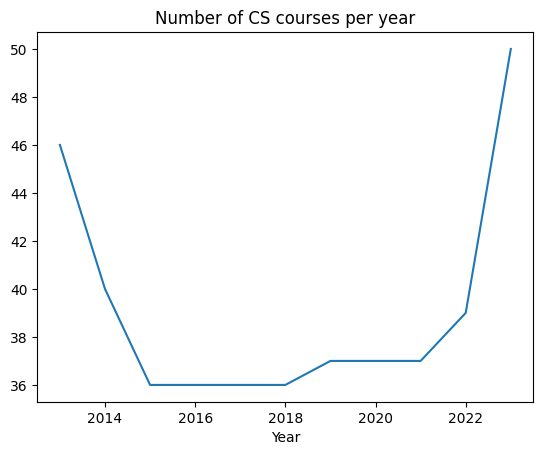

In [6]:
# prompt: plot the number of course descriptions per year

df_count.groupby('Year')['Department'].count().plot(kind='line', title='Number of CS courses per year')


Looking at the number of courses provides clues about changes: the number of courses dropped in 2015 and 2015, then remained stable until 2019 when they added one course.

In [7]:

# prompt: how many rows in df for a particular department
dept = "CS"
df_count = df[df['Department'] == dept]
print("Number of course descrptions for " + str(dept) + ": " + str(len(df_count)))

# number of descriptions per year for that department
df_count.groupby('Year')['Department'].count()

Number of course descrptions for CS: 430


Year
2013    46
2014    40
2015    36
2016    36
2017    36
2018    36
2019    37
2020    37
2021    37
2022    39
2023    50
Name: Department, dtype: int64

## Extracting the departmental data for the department to be analyzed and cleaning it ##

In [8]:
# Extract all descriptions for a particular department
dept = "CS"
dept_df = df[df["Department"] == dept]
dept_df

,Department,Number,Title,Description,Year
759,CS,115,ELEMENTS OF COMPUTER SCIENCE3 HRS,"(Prerequisites, 1 year of high school algebra,...",2013
760,CS,130,MICROCOMPUTER PROBLEM SOLVING3 HRS,"(Prerequisite, one year of high school algebra...",2013
761,CS,201,CURRENT TOPICS IN COMPUTERSCIENCE1-3 HRS,This course will provide a study of selected t...,2013
762,CS,220,INTRODUCTION TO COMPUTERSCIENCE3 HRS,"(Prerequisite, high school algebra.) An overvi...",2013
763,CS,234,SOFTWARE IMPLEMENTATION AND UTILIZATION3 HRS,"(Prerequisites, CS 130 and CS 220.) This cours...",2013
...,...,...,...,...,...
25240,CS,584,RAPID APPLICATION DEVELOPMENT3 HRS,This course introduces the student to Rapid Ap...,2023
25241,CS,590,GAME DEVELOPMENT3 HRS,"(Prerequisite, CS 343 and CS 370) This course ...",2023
25242,CS,620,COMPUTER NETWORKSAND INTERNETS3 HRS,"(Prerequisite, MA 110.) This course answers th...",2023
25243,CS,625,HTML PROGRAMMING3 HRS,This course provides the student with the info...,2023


Note that we're pretty sure this is correct because 430 descriptions is what we found in the summary of the data above.

Next, convert the Description and Title to all lower case.

In [9]:
# prompt: lowercase dept_df$Description
dept_df['Description'] = dept_df['Description'].str.lower()
dept_df['Title'] = dept_df['Title'].str.lower()

<ipython-input-9-c7f14652e0e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dept_df['Description'] = dept_df['Description'].str.lower()
<ipython-input-9-c7f14652e0e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dept_df['Title'] = dept_df['Title'].str.lower()


Remove courses that don't contain topical titles or descriptions, such as directed readings, practicums, and special topics. The number of courses (rows) should decrease.

In [10]:
# Remove  rows (courses) for disseration, thesis, independent study, continuous enrollment, and independent study which don't contain
# topical titles or descriptions. Add any that you've noticed in the department you're cleaning

dept_df = dept_df[~dept_df['Title'].str.contains('practicum')]
dept_df = dept_df[~dept_df['Title'].str.contains('directed')]
dept_df = dept_df[~dept_df['Title'].str.contains('dissertation3-15')]
dept_df = dept_df[~dept_df['Title'].str.contains('dissertation')]
dept_df = dept_df[~dept_df['Title'].str.contains('continuous')]
dept_df = dept_df[~dept_df['Title'].str.contains('independent')]
dept_df = dept_df[~dept_df['Title'].str.contains('special topics')]
dept_df = dept_df[~dept_df['Title'].str.contains('graduate research')]
dept_df = dept_df[~dept_df['Title'].str.contains('graduate project')]
dept_df = dept_df[~dept_df['Title'].str.contains('special topics')]
dept_df = dept_df[~dept_df['Title'].str.contains('current topics')]
dept_df = dept_df[~dept_df['Title'].str.contains('seminar')]

dept_df

,Department,Number,Title,Description,Year
759,CS,115,elements of computer science3 hrs,"(prerequisites, 1 year of high school algebra,...",2013
760,CS,130,microcomputer problem solving3 hrs,"(prerequisite, one year of high school algebra...",2013
762,CS,220,introduction to computerscience3 hrs,"(prerequisite, high school algebra.) an overvi...",2013
763,CS,234,software implementation and utilization3 hrs,"(prerequisites, cs 130 and cs 220.) this cours...",2013
764,CS,250,introduction to computerprogramming3 hrs,"(prerequisite, ma 110.) this course is designe...",2013
...,...,...,...,...,...
25239,CS,580,introduction to computernetworks3 hrs,"(prerequisite, cs 340, ma 161.) an introductor...",2023
25240,CS,584,rapid application development3 hrs,this course introduces the student to rapid ap...,2023
25241,CS,590,game development3 hrs,"(prerequisite, cs 343 and cs 370) this course ...",2023
25242,CS,620,computer networksand internets3 hrs,"(prerequisite, ma 110.) this course answers th...",2023


Split (tokenize) each Description by sentence and create one row per sentence in the df.

In [11]:
# prompt: # prompt: for each dept_df$Description, split the value of dept_df$Description by sentence, add each sentence to new df with one row per sentence, include dept_df$Departmene, dep_df$Number, dept_df$Year in the new df

#import pandas as pd
#from nltk.tokenize import sent_tokenize

#dept_df = pd.DataFrame({'Department': ['CS'], 'Number': ['101'], 'Year': [2014], 'Description': ['This course introduces the basic principles of computer science, including problem solving, algorithms, data structures, and computer organization. Topics include: problem-solving techniques, algorithm design and analysis, data structures such as arrays, linked lists, stacks, and queues, and the basic organization of a computer system.']})

description_list = []
department_list = []
number_list = []
year_list = []

for i in range(len(dept_df)):
  description = dept_df["Description"].iloc[i]
  sentences = sent_tokenize(description)
  for sentence in sentences:
    description_list.append(sentence)
    department_list.append(dept_df['Department'].iloc[i])
    number_list.append(dept_df['Number'].iloc[i])
    year_list.append(dept_df['Year'].iloc[i])

sentence_df = pd.DataFrame({
  "Sentence": description_list,
  "Department": department_list,
  "Number": number_list,
  "Year": year_list
})

print(sentence_df)

                                               Sentence Department Number  \
0     (prerequisites, 1 year of high school algebra,...         CS    115   
1     this course covers the computer and computer a...         CS    115   
2     topics include the history of computing, hardw...         CS    115   
3     the course is designed for students who will u...         CS    115   
4      (prerequisite, one year of high school algebra.)         CS    130   
...                                                 ...        ...    ...   
1238                            (prerequisite, ma 110.)         CS    620   
1239  this course answers the basic question “how do...         CS    620   
1240  the course provides a comprehensive, self-cont...         CS    620   
1241  this course provides the student with the info...         CS    625   
1242  the course will cover syntax and design issues...         CS    625   

      Year  
0     2013  
1     2013  
2     2013  
3     2013  
4     2013

Remove all rows (sentences) that contain statements about prerequisites. The number of rows (sentences) should decrease.

In [12]:
# prompt: remove and row of dept_df where dept_df$Sentence contains "(Prerequisite"
sentence_df = sentence_df[~sentence_df['Sentence'].str.contains('prerequisite')]
sentence_df

,Sentence,Department,Number,Year
1,this course covers the computer and computer a...,CS,115,2013
2,"topics include the history of computing, hardw...",CS,115,2013
3,the course is designed for students who will u...,CS,115,2013
5,an introductory study of problem solving using...,CS,130,2013
6,basic programming skills and efficient techniq...,CS,130,2013
...,...,...,...,...
1237,students are expected to conceptualize and dev...,CS,590,2023
1239,this course answers the basic question “how do...,CS,620,2023
1240,"the course provides a comprehensive, self-cont...",CS,620,2023
1241,this course provides the student with the info...,CS,625,2023


## Split descriptions up by year for comparison ##

In [13]:
years = [2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

# Create an empty dictionary to store the dataframes
dfs = {}

for year in years:
  dfs[year] = sentence_df[sentence_df['Year'] == year]

# Just to avoid confusion I renamed the dfs for each year

df2013 = dfs[2013]
df2014 = dfs[2014]
df2015 = dfs[2015]
df2016 = dfs[2016]
df2017 = dfs[2017]
df2018 = dfs[2018]
df2019 = dfs[2019]
df2020 = dfs[2020]
df2021 = dfs[2021]
df2022 = dfs[2022]
df2023 = dfs[2023]
df2024 = dfs[2024]


In [14]:
# Take a peek at the results to make sure they're correct...sorting by year
# df2023.sort_values(by='Number')
df2015.head()

,Sentence,Department,Number,Year
220,this course covers the computer and computer a...,CS,115,2015
221,"topics include the history of computing, hardw...",CS,115,2015
222,the course is designed for students who will u...,CS,115,2015
224,an overview of the discipline of computer scie...,CS,220,2015
225,topics to be covered will consist of introduct...,CS,220,2015


# Word Clouds and Topic Modeling

This section borrows code from two sources:
Beginners guide to topic modeling in python and feature selection. (2016, August 24). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

Kapadia, S. (2022, December 23). Topic Modeling in Python: Latent Dirichlet Allocation (LDA). Medium. https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0




## Word Clouds

The Sentence text data have already been cleaned and lowercased.

In [16]:
# Load data for a year's worth of course descriptions into a df if you're starting here without having run the code chunks above.

df2014 = pd.read_csv("your file path")


FileNotFoundError: [Errno 2] No such file or directory: '/content/df2014.csv'

In [15]:
# prompt: remove stopwords from df2014

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  """Removes stop words from a string of text."""
  words = word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return " ".join(filtered_words)

df2014['Sentence'] = df2014['Sentence'].apply(remove_stopwords)


<ipython-input-15-c9cca379402d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2014['Sentence'] = df2014['Sentence'].apply(remove_stopwords)


In [16]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  """Removes stop words from a string of text."""
  words = word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return " ".join(filtered_words)

df2014['Sentence'] = df2014['Sentence'].apply(remove_stopwords)

<ipython-input-16-c9f7d82d4869>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2014['Sentence'] = df2014['Sentence'].apply(remove_stopwords)


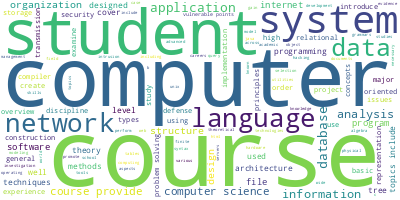

In [17]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df2014['Sentence'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

If necessary, create a list of customized stop words called addl_sw, remove them from the data, then rerun the word cloud code. Repeat until you're satisfied with your word cloud.

In [18]:
addl_sw = ['course', 'courses', 'student', 'students', 'university', 'university', 'year', 'course']

In [19]:
# prompt: remove addl_sw from df2024

def remove_stopwords(text):
  """Removes stop words from a string of text."""
  words = word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in addl_sw]
  return " ".join(filtered_words)

df2014['Sentence'] = df2014['Sentence'].apply(remove_stopwords)


<ipython-input-19-f9dc8e19f574>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2014['Sentence'] = df2014['Sentence'].apply(remove_stopwords)


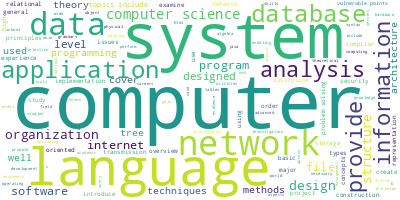

In [20]:
# Join the different processed titles together.
long_string = ','.join(list(df2014['Sentence'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Topic Modeling

This section borrows code from two sources:
Beginners guide to topic modeling in python and feature selection. (2016, August 24). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

Kapadia, S. (2022, December 23). Topic Modeling in Python: Latent Dirichlet Allocation (LDA). Medium. https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [28]:
# Tokenize df2014['Sentence'] into a corpus and dictionary

from gensim import corpora, models
import gensim

# Tokenize the sentences
tokenized_sentences = [word_tokenize(sentence) for sentence in df2014['Sentence']]

# Create a dictionary from the tokenized sentences
id2word = corpora.Dictionary(tokenized_sentences)

# Create a corpus from the dictionary and the tokenized sentences
corpus = [id2word.doc2bow(text) for text in tokenized_sentences]

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1)]


In [36]:

from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.028*"." + 0.025*"information" + 0.020*"computer" + 0.020*"designed" + '
  '0.017*"," + 0.014*"design" + 0.014*"internet" + 0.014*"well" + '
  '0.013*"techniques" + 0.012*"create"'),
 (1,
  '0.153*"," + 0.042*"." + 0.012*"computer" + 0.011*"include" + 0.011*"topics" '
  '+ 0.010*"analysis" + 0.010*"system" + 0.010*";" + 0.009*"language" + '
  '0.009*"software"'),
 (2,
  '0.056*"." + 0.050*"," + 0.023*"data" + 0.016*"systems" + 0.014*"database" + '
  '0.013*"file" + 0.011*"application" + 0.011*"levels" + 0.011*"vulnerable" + '
  '0.011*"points"'),
 (3,
  '0.049*"computer" + 0.049*"." + 0.019*"network" + 0.018*"," + '
  '0.015*"analysis" + 0.014*"languages" + 0.013*"concepts" + 0.013*"general" + '
  '0.013*"principles" + 0.011*"defense"'),
 (4,
  '0.045*"." + 0.023*"experience" + 0.016*"academic" + 0.016*"computer" + '
  '0.014*"internet" + 0.012*"science" + 0.011*"language" + 0.010*"design" + '
  '0.010*";" + 0.010*"field"')]


As Kapadia (2022, sec "LDA model training") says, "To keep things simple, we’ll keep all the parameters to default except for inputting the number of topics. For this tutorial, we will build a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic." In the results above, each topic is numbered and contains not only keywords for the topic but also the weight overall weight of the topic and the weight each keyword adds to the topic.

The next step is interpretting the results and naming each topic. Keyword weights should be used to interpret topics. It is also useful to review sections of input data to identify the context in which keywords appear (Van Kessel, 2021).

The code below results in a visualization of the output of the previous code chunk. If you are new to topic modeling, especially interpretting results, it is recommended that you read Van Kessel's (2021) series of blog posts.



In [37]:
# prompt: create visualization of lda_model

import pyLDAvis.gensim_models
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.120358  0.035953       1        1  46.671131
0      0.089265 -0.024344       2        1  17.082781
2     -0.044700 -0.085928       3        1  14.659279
3      0.041958  0.017834       4        1  13.815754
4      0.033834  0.056484       5        1   7.771054, topic_info=            Term       Freq      Total Category  logprob  loglift
6              ,  63.000000  63.000000  Default  30.0000  30.0000
0              .  32.000000  32.000000  Default  29.0000  29.0000
2       computer  12.000000  12.000000  Default  28.0000  28.0000
11          data   5.000000   5.000000  Default  27.0000  27.0000
31   information   5.000000   5.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
171            ;   0.605266   5.585329   Topic5  -4.5701   0.3325
147     database   0.527014   5.024215   Topic5  -4.7085   0.3000
69      provides   0.526506   3.678794   Topic5  -4.7095   0.6107
199      storage   0.525674   2.511255   Topic5  -4.7110   0.9909
203        basic   0.525446   2.686222   Topic5  -4.7115   0.9231

[257 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
6         1  0.853879             ,
6         2  0.031625             ,
6         3  0.094875             ,
6         4  0.031625             ,
345       1  0.684304            --
...     ...       ...           ...
88        2  0.540987          wide
74        3  0.868780        wiring
116       5  0.952252  workstations
89        2  0.540748         world
45        4  0.823775         write

[259 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4, 5])

Remember that the number of topics used above is the default, 10 topics. You may choose to increase or decrease the number of topics generated to improve your model and acheive more meaningful results.

## Examining changes in trigrams year by year ##

Years following the first year are contracted. Expand them by clicking on the > symbol next to the year.

### 2013-14 ###

In [ ]:
# Take a peek at the results to make sure they're correct...sorting by year
# df2023.sort_values(by='Number')
df2013

,Sentence,Department,Number,Year
1,this course covers the computer and computer a...,CS,115,2013
2,"topics include the history of computing, hardw...",CS,115,2013
3,the course is designed for students who will u...,CS,115,2013
5,an introductory study of problem solving using...,CS,130,2013
6,basic programming skills and efficient techniq...,CS,130,2013
...,...,...,...,...
132,basic physical characteristics of peripheral s...,CS,780,2013
133,file organization and processing methods for s...,CS,780,2013
134,application of data structure concepts to logi...,CS,780,2013
135,performance analysis.,CS,780,2013


Next I want to know which courses were new in 2014 and which description sentences were new in 2014.

In [ ]:
# prompt:  Create df2014['new_in_2014']. For every df2014['Number'] that is duplicated in df2013['Number'], the value of df2014['new_in_2014']
# should be False, otherwise, the value of df2014['new_in_2014'] should be True.

df2014['new_course_in_2014'] = ~df2014['Number'].isin(df2013['Number'])

# prompt: Create df2014$dup. For every df2014$sentence that is duplicated in df2013$sentence, the value of df2014$du
# should be True, otherwise, the value of df2014$du should be False

df2014['dup_in_2013'] = df2014['Sentence'].isin(df2013['Sentence'])

# prompt: new df containing only rows where df2014$dup = False (i.e. is not duplicated from 2013)

df2014_dup = df2014[df2014['dup_in_2013'] == False]

print("new courses in 2014:")
print(df2014['Number'][df2014['new_course_in_2014'] == True].tolist())

print("new descriptions in 2014")
print(df2014_dup)

new courses in 2014:
[]
new descriptions in 2014
                                              Sentence Department Number  \
150  java is an object-oriented language that has b...         CS    301   
153  in the broadest sense the course provides a co...         CS    320   
154   this course provides the student with the inf...         CS    325   
172  database design using the entity-relationship ...         CS    444   
202   network defense and countermeasures focuses o...         CS    564   
203   this course examines procedures and tools for...         CS    565   
207   this course introduces the student to rapid a...         CS    584   
209   this course provides the student with the inf...         CS    625   

     Year  new_course_in_2014  dup_in_2013  
150  2014               False        False  
153  2014               False        False  
154  2014               False        False  
172  2014               False        False  
202  2014               False        Fals

<ipython-input-27-0e0f90baf178>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2014['new_course_in_2014'] = ~df2014['Number'].isin(df2013['Number'])
<ipython-input-27-0e0f90baf178>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2014['dup_in_2013'] = df2014['Sentence'].isin(df2013['Sentence'])


There were no new courses added for 2014, but 8 course description sentences changed.

Examine the new descriptions for 2014, starting by using tri-grams.

First, create a new column for senetences that have stopwords removed from them.

In [ ]:
# prompt: remove stopwords from df2014_dup$Sentence and add them to df2014_dup$clean_Sentences

df2014_dup["clean_Sentences"] = df2014_dup["Sentence"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words("english")]))
df2014_dup

<ipython-input-28-101762ea9068>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2014_dup["clean_Sentences"] = df2014_dup["Sentence"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words("english")]))


,Sentence,Department,Number,Year,new_course_in_2014,dup_in_2013,clean_Sentences
150,java is an object-oriented language that has b...,CS,301,2014,False,False,java object-oriented language become important...
153,in the broadest sense the course provides a co...,CS,320,2014,False,False,"broadest sense course provides comprehensive, ..."
154,this course provides the student with the inf...,CS,325,2014,False,False,course provides student information necessary ...
172,database design using the entity-relationship ...,CS,444,2014,False,False,database design using entity-relationship model.
202,network defense and countermeasures focuses o...,CS,564,2014,False,False,network defense countermeasures focuses studen...
203,this course examines procedures and tools for...,CS,565,2014,False,False,course examines procedures tools identificatio...
207,this course introduces the student to rapid a...,CS,584,2014,False,False,course introduces student rapid application de...
209,this course provides the student with the inf...,CS,625,2014,False,False,course provides student information necessary ...


Now, find the tri-grams among the clean_Sentences

In [ ]:
# prompt: tri-grams in df2014_dup$clean_Sentences

# Create a list of trigrams for each sentence in the 'Sentence' column of df2014_dup.
trigrams = []
for sentence in df2014_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame.
print(trigrams_df)


               Word1            Word2         Word3
0               java  object-oriented      language
1    object-oriented         language        become
2           language           become     important
3             become        important      language
4          important         language           use
..               ...              ...           ...
136       techniques     technologies       promote
137     technologies          promote   information
138          promote      information  transmission
139      information     transmission        across
140     transmission           across      internet

[141 rows x 3 columns]


There are 141 trigrams, which is probably too many. Just looking at the first 5 and the last 5 it appears as if we could remove some more words that don't add to the meaning of course topics.

In [ ]:
print(trigrams_df.head(50))

              Word1                Word2                Word3
0              java      object-oriented             language
1   object-oriented             language               become
2          language               become            important
3            become            important             language
4         important             language                  use
5          language                  use            internet.
6          broadest                sense               course
7             sense               course             provides
8            course             provides       comprehensive,
9          provides       comprehensive,       self-contained
10   comprehensive,       self-contained                 tour
11   self-contained                 tour           networking
12             tour           networking               lowest
13       networking               lowest               levels
14           lowest               levels                 data
15      

In [ ]:
# create a new list of additional stopwords
additional_stopwords = ['become', 'use', 'promote', 'across', 'sense', 'course', 'tour', 'lowest', 'levels', 'student', 'provides',
                        'students', 'provides', 'provide', 'focuses', 'understanding', 'using', 'promote', 'well', 'issues', 'cover',
                        'create', 'necessary', 'tour', 'broadest', 'sense', 'comprehensive']

# remove them from the cleaned sentences
df2014_dup["clean_Sentences"] = df2014_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))

# review the new trigrams
# Create a list of trigrams for each sentence in the 'clean_Sentence' column of df2014_dup.
trigrams = []
for sentence in df2014_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame.
print(trigrams_df.head(25))
print(len(trigrams_df))

              Word1                Word2                Word3
0              java      object-oriented             language
1   object-oriented             language            important
2          language            important             language
3         important             language            internet.
4    comprehensive,       self-contained           networking
5    self-contained           networking                 data
6        networking                 data         transmission
7              data         transmission               wiring
8      transmission               wiring              highest
9            wiring              highest          application
10          highest          application             software
11      information                 html            documents
12             html            documents                world
13        documents                world                 wide
14            world                 wide                  web
15      

<ipython-input-31-e306b63f5d1d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2014_dup["clean_Sentences"] = df2014_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


Trigrams went from 141 to 98. But I want to try refining them a bit more so I'll repeat the steps above by looking at the first fifty and then the last fifty trigrams and adding more stopwords to my list called additional_stopwords.

In [ ]:
print(trigrams_df.head(50))

              Word1                Word2                Word3
0              java      object-oriented             language
1   object-oriented             language            important
2          language            important             language
3         important             language            internet.
4    comprehensive,       self-contained           networking
5    self-contained           networking                 data
6        networking                 data         transmission
7              data         transmission               wiring
8      transmission               wiring              highest
9            wiring              highest          application
10          highest          application             software
11      information                 html            documents
12             html            documents                world
13        documents                world                 wide
14            world                 wide                  web
15      

In [ ]:
print(trigrams_df.tail(50))

               Word1             Word2             Word3
48         detection          systems,           perform
49          systems,           perform            packet
50           perform            packet         signature
51            packet         signature         analysis,
52         signature         analysis,          identify
53         analysis,          identify         different
54          identify         different           methods
55         different           methods              risk
56           methods              risk         analysis,
57              risk         analysis,          security
58         analysis,          security            policy
59          examines        procedures             tools
60        procedures             tools  identifications,
61             tools  identifications,     preservation,
62  identifications,     preservation,        extraction
63     preservation,        extraction        electronic
64        extraction        ele

In [ ]:
#
additional_stopwords.extend(['highest', 'implement', 'also', 'gain','knowledge', 'working', 'perform', 'different', 'methods',
                             'tools', 'procedures', 'introduce', 'introduces'])


df2014_dup["clean_Sentences"] = df2014_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))

# Review trigrams again
# Create a list of trigrams for each sentence in the 'clean_Sentence' column of df2014_dup.
trigrams = []
for sentence in df2014_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame.
print(trigrams_df.head(25))
print(len(trigrams_df))

              Word1                Word2                Word3
0              java      object-oriented             language
1   object-oriented             language            important
2          language            important             language
3         important             language            internet.
4    comprehensive,       self-contained           networking
5    self-contained           networking                 data
6        networking                 data         transmission
7              data         transmission               wiring
8      transmission               wiring          application
9            wiring          application             software
10      information                 html            documents
11             html            documents                world
12        documents                world                 wide
13            world                 wide                  web
14             wide                  web               syntax
15      

<ipython-input-34-c71b5fd6f78b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2014_dup["clean_Sentences"] = df2014_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


That brought the number of trigams down to 86. I still see a lot of duplication of terms in my trigrams so I'll take a quick look at them as four-grams to see if that makes a significant difference in the amount of repetition.

In [ ]:
# prompt: Create a list of four-grams for each sentence in the 'clean_Sentence' column of df2014_dup.

# Create a list of four-grams for each sentence in the 'clean_Sentence' column of df2014_dup.
four_grams = []
for sentence in df2014_dup['clean_Sentences']:
  four_grams.extend(list(nltk.ngrams(sentence.split(), 4)))

# Create a DataFrame with the four-grams.
four_grams_df = pd.DataFrame(four_grams, columns=['Word1', 'Word2', 'Word3', 'Word4'])

# Print the DataFrame.
print(four_grams_df.head(25))
print(len(four_grams_df))


              Word1            Word2                Word3         Word4
0              java  object-oriented             language     important
1   object-oriented         language            important      language
2          language        important             language     internet.
3    comprehensive,   self-contained           networking          data
4    self-contained       networking                 data  transmission
5        networking             data         transmission        wiring
6              data     transmission               wiring   application
7      transmission           wiring          application      software
8       information             html            documents         world
9              html        documents                world          wide
10        documents            world                 wide           web
11            world             wide                  web        syntax
12             wide              web               syntax       

In [ ]:
print(four_grams_df.tail(50))

               Word1             Word2          Word3          Word4
28           network           defense     structures      firewalls
29           defense        structures      firewalls        various
30        structures         firewalls        various      platforms
31         firewalls           various      platforms        virtual
32           various         platforms        virtual        private
33         platforms           virtual        private       networks
34           virtual           private       networks      intrusion
35           private          networks      intrusion      detection
36          networks         intrusion      detection       systems,
37         intrusion         detection       systems,         packet
38         detection          systems,         packet      signature
39          systems,            packet      signature      analysis,
40            packet         signature      analysis,       identify
41         signature         analy

Looking at the four-grams gives me the sense that trigrams are better because most of the four-grams are trigrams with a less meaningful word added, for instance virtual private network intrusion. I decided to stick with trigrams and use the four grams to refine the sentences once more.

In [ ]:
additional_stopwords.extend(['techniques', 'technologies', 'practice', 'programs', 'identify', 'various', 'platforms'])


df2014_dup["clean_Sentences"] = df2014_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))

# Review trigrams again
# Create a list of trigrams for each sentence in the 'clean_Sentence' column of df2014_dup.
trigrams = []
for sentence in df2014_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame.
print(trigrams_df.head(25))
print(len(trigrams_df))

              Word1                Word2                Word3
0              java      object-oriented             language
1   object-oriented             language            important
2          language            important             language
3         important             language            internet.
4    comprehensive,       self-contained           networking
5    self-contained           networking                 data
6        networking                 data         transmission
7              data         transmission               wiring
8      transmission               wiring          application
9            wiring          application             software
10      information                 html            documents
11             html            documents                world
12        documents                world                 wide
13            world                 wide                  web
14             wide                  web               syntax
15      

<ipython-input-37-58c5db2ca62a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2014_dup["clean_Sentences"] = df2014_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


In [ ]:
# prompt: save the list of additional stopwords to .txt

with open('additional_stopwords.txt', 'w') as f:
  for word in additional_stopwords:
    f.write(word + '\n')


### 2014-15 ###

Next I want to know which courses were new in 2015 and which description sentences were new in 2015.

In [ ]:
# prompt:  Create df2015['new_in_2015']. For every df2015['Number'] that is duplicated in df2014['Number'], the value of df2015['new_in_2015']
# should be False, otherwise, the value of df2015['new_in_2015'] should be True.

df2015['new_course_in_2015'] = ~df2015['Number'].isin(df2014['Number'])

# prompt: Create df2015$dup. For every df2015$sentence that is duplicated in df2014$sentence, the value of df2015$du
# should be True, otherwise, the value of df2015$du should be False

df2015['dup_in_2014'] = df2015['Sentence'].isin(df2014['Sentence'])

# prompt: new df containing only rows where df2015$dup = False (i.e. is not duplicated from 2014)

df2015_dup = df2015[df2015['dup_in_2014'] == False]

print("new courses in 2015:")
print((df2015['Number'][df2015['new_course_in_2015'] == True]).unique().tolist())


print("new descriptions in 2015")
print(df2015_dup)

new courses in 2015:
['220', '234', '250', '315', '340', '501', '552', '554', '555', '557', '580', '620']
new descriptions in 2015
                                              Sentence Department Number  \
224  an overview of the discipline of computer scie...         CS    220   
225  topics to be covered will consist of introduct...         CS    220   
226  this is intended as a first course for compute...         CS    220   
228  this course will introduce the secondary educa...         CS    234   
229  the course will provide its participants with ...         CS    234   
232  major emphasis will be placed on problem solvi...         CS    250   
238  an overview of information technology and its ...         CS    301   
239  through a hands-on approach, students will lea...         CS    301   
240  students will have the opportunity to reflect ...         CS    301   
242  java is an object- oriented language that has ...         CS    315   
245  basic concepts of data struc

<ipython-input-43-aba901cb83c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2015['new_course_in_2015'] = ~df2015['Number'].isin(df2014['Number'])
<ipython-input-43-aba901cb83c1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2015['dup_in_2014'] = df2015['Sentence'].isin(df2014['Sentence'])


Examine the new descriptions for 2015, starting by using tri-grams.

First, create a new column for senetences that have stopwords removed from them.

In [ ]:
# prompt: remove stopwords from df2015_dup$Sentence and add them to df2015_dup$clean_Sentences

df2015_dup["clean_Sentences"] = df2015_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words("english")]))
df2015_dup["clean_Sentences"] = df2015_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))
#df2015_dup

# prompt: tri-grams in df2015_dup$clean_Sentences

# Create a list of trigrams for each sentence in the 'Sentence' column of df2015_dup.
trigrams = []
for sentence in df2015_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame.
print(trigrams_df.head(50))
print(len(trigrams_df))

                    Word1                  Word2                  Word3
0                overview             discipline               computer
1              discipline               computer               science.
2                  topics                covered                consist
3                 covered                consist          introductions
4                 consist          introductions          “traditional”
5           introductions          “traditional”                  areas
6           “traditional”                  areas               computer
7                   areas               computer                science
8                computer                science                   data
9                 science                   data            structures,
10                   data            structures,             assemblers
11            structures,             assemblers             compilers,
12             assemblers             compilers,                

<ipython-input-49-5c8324c6c4ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2015_dup["clean_Sentences"] = df2015_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words("english")]))
<ipython-input-49-5c8324c6c4ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2015_dup["clean_Sentences"] = df2015_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


In [ ]:
print(trigrams_df.tail(50))

               Word1            Word2            Word3
248         auditing    investigation          network
249    investigation          network             host
250          network             host           system
251             host           system      intrusions,
252           system      intrusions,         analysis
253      intrusions,         analysis    documentation
254         analysis    documentation      information
255    documentation      information        gathered,
256      information        gathered,      preparation
257        gathered,      preparation           expert
258      preparation           expert      testimonial
259           expert      testimonial        evidence.
260     introductory      examination             open
261      examination             open           system
262             open           system  interconnection
263           system  interconnection        reference
264  interconnection        reference            model
265       

In [ ]:
# Add words from the 2015 trigrams to the additional stopwords list
additional_stopwords.extend(['overview', 'discipline', 'computer', 'science', 'topics', 'covered', 'consist', 'introductions', 'areas',
                             'problem', 'solving', 'major', 'emphasis', 'placed', 'teacher', 'learning', 'community', 'assist', 'employing',
                             'intended', 'first', 'introductions','utilizing', 'majors', 'emphasis', 'given', 'real', '"how"','basic',
                             'question', ])


df2015_dup["clean_Sentences"] = df2015_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))

# Review trigrams again
# Create a list of trigrams for each sentence in the 'clean_Sentence' column of df2014_dup.
trigrams = []
for sentence in df2015_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame.
print(trigrams_df.head(50))
print(len(trigrams_df))

                    Word1                  Word2                   Word3
0           “traditional”                   data             structures,
1                    data            structures,              assemblers
2             structures,             assemblers              compilers,
3              assemblers             compilers,                  theory
4              compilers,                 theory              computing,
5                  theory             computing,              artificial
6              computing,             artificial           intelligence,
7              artificial          intelligence,                  theory
8           intelligence,                 theory                    data
9                  theory                   data                  bases,
10                   data                 bases,             programming
11                 bases,            programming              languages.
12              secondary              education   

<ipython-input-52-57971c40aee0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2015_dup["clean_Sentences"] = df2015_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


Keep adding words to the additional list of stopwords and reviewing the trigrams until they reach the right level of refinement, e.g. when they contain only meaningful course topics.

In [ ]:
# Add words from the 2015 trigrams to the additional stopwords list
additional_stopwords.extend(['(past/present/future.)', 'society', 'opportunity', 'limitation', 'learn', 'fundamentals', 'approach', 'hands-on',
                             'relation', 'pointer', 'variable'])


df2015_dup["clean_Sentences"] = df2015_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))

# Review trigrams again
# Create a list of trigrams for each sentence in the 'clean_Sentence' column of df2014_dup.
trigrams = []
for sentence in df2015_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame.
print(trigrams_df.tail(50))
print(len(trigrams_df))

                Word1             Word2            Word3
196          examines  identifications,    preservation,
197  identifications,     preservation,       extraction
198     preservation,        extraction       electronic
199        extraction        electronic        evidence,
200        electronic         evidence,         auditing
201         evidence,          auditing    investigation
202          auditing     investigation          network
203     investigation           network             host
204           network              host           system
205              host            system      intrusions,
206            system       intrusions,         analysis
207       intrusions,          analysis    documentation
208          analysis     documentation      information
209     documentation       information        gathered,
210       information         gathered,      preparation
211         gathered,       preparation           expert
212       preparation          

<ipython-input-54-d2e5e7a48799>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2015_dup["clean_Sentences"] = df2015_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


In [ ]:
# Add words from the 2015 trigrams to the additional stopwords list
additional_stopwords.extend(['examines', 'examine', '"how', '"operate?"', 'answers', 'special', 'implementations', 'gathered',
                             'preparation', 'sense.', 'examines', 'examination', 'wiring', 'identifications'])


df2015_dup["clean_Sentences"] = df2015_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))

# Review trigrams again
# Create a list of trigrams for each sentence in the 'clean_Sentence' column of df2014_dup.
trigrams = []
for sentence in df2015_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame.
print(trigrams_df.tail(50))
print(len(trigrams_df))

                Word1            Word2            Word3
188         intrusion        detection         systems,
189         detection         systems,           packet
190          systems,           packet        signature
191            packet        signature        analysis,
192         signature        analysis,             risk
193         analysis,             risk        analysis,
194              risk        analysis,         security
195         analysis,         security          policy.
196  identifications,    preservation,       extraction
197     preservation,       extraction       electronic
198        extraction       electronic        evidence,
199        electronic        evidence,         auditing
200         evidence,         auditing    investigation
201          auditing    investigation          network
202     investigation          network             host
203           network             host           system
204              host           system      intr

<ipython-input-55-2fce3faa81bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2015_dup["clean_Sentences"] = df2015_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


#### save the new stopwords list ####

In [ ]:
# prompt: export additional_stopwords to fil

with open('extended_additional_stopwords.txt', 'w') as f:
  for word in additional_stopwords:
    f.write(word + '\n')

### 2015-16 ###

I found it easiest to copy and paste the code for each year's analysis into another notebook, then use find and replace to change the years, then copy it back into this notebook. Find and replace the ealier year first, then the later year.

Next I want to know which courses were new in 2016 and which description sentences were new in 2016.

In [ ]:
# prompt:  Create df2016['new_in_2016']. For every df2016['Number'] that is duplicated in df2015['Number'], the value of df2016['new_in_2016']
# should be False, otherwise, the value of df2016['new_in_2016'] should be True.

df2016['new_course_in_2016'] = ~df2016['Number'].isin(df2015['Number'])

# prompt: Create df2016$dup. For every df2016$sentence that is duplicated in df2015$sentence, the value of df2016$du
# should be True, otherwise, the value of df2016$du should be False

df2016['dup_in_2015'] = df2016['Sentence'].isin(df2015['Sentence'])

# prompt: new df containing only rows where df2016$dup = False (i.e. is not duplicated from 2015)

df2016_dup = df2016[df2016['dup_in_2015'] == False]

print("new courses in 2016:")
print(df2016['Number'][df2016['new_course_in_2016'] == True].tolist())

print("new descriptions in 2016")
print(df2016_dup)

new courses in 2016:
[]
new descriptions in 2016
                                              Sentence Department Number  \
338  major emphasis will be placed on problem solvi...         CS    250   
344   an overview of information technology and its...         CS    301   
348  java is an object-oriented language that has b...         CS    315   
365  overview of database architectures, including ...         CS    444   
366  database interfaces, including the sql query l...         CS    444   
406   network defense and countermeasures focuses o...         CS    564   

     Year  new_course_in_2016  dup_in_2015  
338  2016               False        False  
344  2016               False        False  
348  2016               False        False  
365  2016               False        False  
366  2016               False        False  
406  2016               False        False  


<ipython-input-57-963c84a7078d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2016['new_course_in_2016'] = ~df2016['Number'].isin(df2015['Number'])
<ipython-input-57-963c84a7078d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2016['dup_in_2015'] = df2016['Sentence'].isin(df2015['Sentence'])


Examine the new descriptions for 2016, starting by using tri-grams.

First, create a new column for senetences that have stopwords removed from them.

In [ ]:
# prompt: remove stopwords from df2016_dup$Sentence and add them to df2016_dup$clean_Sentences

df2016_dup["clean_Sentences"] = df2016_dup["Sentence"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words("english")]))

# prompt: load the content of additional_stopwords(1).txt into a list

with open("/content/extended_additional_stopwords.txt", "r") as f:
  additional_stopwords = [line.strip() for line in f]

# prompt: new list of additional stopwords

df2016_dup["clean_Sentences"] = df2016_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


# Review trigrams again
# Create a list of trigrams for each sentence in the 'clean_Sentence' column of df2016_dup.
trigrams = []
for sentence in df2016_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame.
print(trigrams_df.head(25))
print(len(trigrams_df))

              Word1            Word2          Word3
0     decomposition         top-down         design
1          top-down           design    algorithms,
2            design      algorithms,     elementary
3       algorithms,       elementary        control
4        elementary          control         record
5           control           record    structures,
6            record      structures,         array,
7       structures,           array,        string,
8            array,          string,           file
9           string,             file    processing,
10             file      processing,      recursion
11      processing,        recursion     variables.
12      information       technology       society.
13             java  object-oriented       language
14  object-oriented         language      important
15         language        important       language
16        important         language      internet.
17         database   architectures,      including
18   archite

<ipython-input-58-061bb84cb9d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2016_dup["clean_Sentences"] = df2016_dup["Sentence"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words("english")]))
<ipython-input-58-061bb84cb9d0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2016_dup["clean_Sentences"] = df2016_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


36 trigrams is pretty few, even for the small number of changes for 2016. Decided to leave that as they are.

### 2016-17 ###

#### was 2015-16, change to 2016-17
2016 changes to 2017, then 2015 changes to 2016 (this is the order in which to find and replace years)



In [ ]:
# prompt:  Create df2017['new_in_2017']. For every df2017['Number'] that is duplicated in df2016['Number'], the value of df2017['new_in_2017']
# should be False, otherwise, the value of df2017['new_in_2017'] should be True.

df2017['new_course_in_2017'] = ~df2017['Number'].isin(df2016['Number'])

# prompt: Create df2017$dup. For every df2017$sentence that is duplicated in df2016$sentence, the value of df2017$du
# should be True, otherwise, the value of df2017$du should be False

df2017['dup_in_2016'] = df2017['Sentence'].isin(df2016['Sentence'])

# prompt: new df containing only rows where df2017$dup = False (i.e. is not duplicated from 2016)

df2017_dup = df2017[df2017['dup_in_2016'] == False]

print("new courses in 2017:")
print(df2017['Number'][df2017['new_course_in_2017'] == True].tolist())

print("new descriptions in 2017")
print(df2017_dup)

new courses in 2017:
[]
new descriptions in 2017
                                              Sentence Department Number  \
449  an overview of information technology and its ...         CS    301   
453  java is an object- oriented language that has ...         CS    315   
471  database interfaces, including the sql query l...         CS    444   
472  issues such as security, integrity, and query ...         CS    444   
512  network defense and countermeasures focuses on...         CS    564   
517  this course covers the basic theoretical princ...         CS    570   

     Year  new_course_in_2017  dup_in_2016  
449  2017               False        False  
453  2017               False        False  
471  2017               False        False  
472  2017               False        False  
512  2017               False        False  
517  2017               False        False  


<ipython-input-59-d0fad9a59b32>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2017['new_course_in_2017'] = ~df2017['Number'].isin(df2016['Number'])
<ipython-input-59-d0fad9a59b32>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2017['dup_in_2016'] = df2017['Sentence'].isin(df2016['Sentence'])


Examine the new descriptions for 2017, starting by using tri-grams.

In [ ]:


# prompt: remove stopwords from df2017_dup$Sentence and add them to df2017_dup$clean_Sentences
df2017_dup["clean_Sentences"] = df2017_dup["Sentence"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words("english")]))

# prompt: load the content of additional_stopwords(1).txt into a list
with open("/content/extended_additional_stopwords.txt", "r") as f:
  additional_stopwords = [line.strip() for line in f]

# remove additional_stopwords
df2017_dup["clean_Sentences"] = df2017_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


# prompt: tri-grams in df2017_dup$clean_Sentences

# Create a list of trigrams for each sentence in the 'Sentence' column of df2017_dup.
trigrams = []
for sentence in df2017_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame.
print(trigrams_df)
print(len(trigrams_df))

              Word1            Word2                     Word3
0       information       technology                  society.
1              java          object-                  oriented
2           object-         oriented                  language
3          oriented         language                 important
4          language        important                  language
5         important         language                 internet.
6          database      interfaces,                 including
7       interfaces,        including                       sql
8         including              sql                     query
9               sql            query                 language.
10        security,       integrity,                     query
11       integrity,            query             optimization.
12          network          defense           countermeasures
13          defense  countermeasures                 students’
14  countermeasures        students’              archi

<ipython-input-63-3dcd8d59a602>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2017_dup["clean_Sentences"] = df2017_dup["Sentence"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words("english")]))
<ipython-input-63-3dcd8d59a602>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2017_dup["clean_Sentences"] = df2017_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


Again, 26 new trigrams seems reasonable.

### 2017-18 ###

#### was 2016-17, change to 2017-18
2017 changes to 2018, then 2016 changes to 2017





In [ ]:
# prompt:  Create df2018['new_in_2018']. For every df2018['Number'] that is duplicated in df2017['Number'], the value of df2018['new_in_2018']
# should be False, otherwise, the value of df2018['new_in_2018'] should be True.

df2018['new_course_in_2018'] = ~df2018['Number'].isin(df2017['Number'])

# prompt: Create df2018$dup. For every df2018$sentence that is duplicated in df2017$sentence, the value of df2018$du
# should be True, otherwise, the value of df2018$du should be False

df2018['dup_in_2017'] = df2018['Sentence'].isin(df2017['Sentence'])

# prompt: new df containing only rows where df2018$dup = False (i.e. is not duplicated from 2017)

df2018_dup = df2018[df2018['dup_in_2017'] == False]

print("new courses in 2018:")
print(df2018['Number'][df2018['new_course_in_2018'] == True].tolist())

print("new descriptions in 2018")
print(df2018_dup)

new courses in 2018:
[]
new descriptions in 2018
                                              Sentence Department Number  \
623  this course covers the basic theoretical princ...         CS    570   

     Year  new_course_in_2018  dup_in_2017  
623  2018               False        False  


<ipython-input-64-fc95a154b708>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2018['new_course_in_2018'] = ~df2018['Number'].isin(df2017['Number'])
<ipython-input-64-fc95a154b708>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2018['dup_in_2017'] = df2018['Sentence'].isin(df2017['Sentence'])


Examine the new descriptions for 2018, starting by using tri-grams.

First, create a new column for sentences that have stopwords removed from them. Then clean that column using additional_stopwords.txt and additional_stopwords_15.

In [ ]:
df2018_dup

,Sentence,Department,Number,Year,new_course_in_2018,dup_in_2017
623,this course covers the basic theoretical princ...,CS,570,2018,False,False


In [ ]:


# prompt: remove stopwords from df2018_dup$Sentence and add them to df2018_dup$clean_Sentences
df2018_dup["clean_Sentences"] = df2018_dup["Sentence"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words("english")]))

# Create a list of trigrams for each sentence in the 'Sentence' column of df2018_dup.
trigrams = []
for sentence in df2018_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame before removing additional_stopwords and additional_stopwords_15
print(len(trigrams_df))


# prompt: load the content of additional_stopwords_15.txt into a list
with open("/content/extended_additional_stopwords.txt", "r") as f:
  additional_stopwords_16 = [line.strip() for line in f]

# remove additional_stopwords_15
df2018_dup["clean_Sentences"] = df2018_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


# prompt: tri-grams in df2018_dup$clean_Sentences

# Create a list of trigrams for each sentence in the 'Sentence' column of df2018_dup.
trigrams = []
for sentence in df2018_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame.
print(trigrams_df)
print(len(trigrams_df))

14
            Word1           Word2           Word3
0          covers     theoretical      principles
1     theoretical      principles        embodied
2      principles        embodied          finite
3        embodied          finite       automata,
4          finite       automata,         context
5       automata,         context            free
6         context            free       grammars,
7            free       grammars,  computability,
8       grammars,  computability,   computational
9  computability,   computational     complexity.
10


<ipython-input-67-4c1e0734cab9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2018_dup["clean_Sentences"] = df2018_dup["Sentence"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words("english")]))
<ipython-input-67-4c1e0734cab9>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2018_dup["clean_Sentences"] = df2018_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


### 2018-19 ###

#### was 2017-18, change to 2018-19
2018 changes to 2019, then 2017 changes to 2018





In [ ]:
# prompt:  Create df2019['new_in_2019']. For every df2019['Number'] that is duplicated in df2018['Number'], the value of df2019['new_in_2019']
# should be False, otherwise, the value of df2019['new_in_2019'] should be True.

df2019['new_course_in_2019'] = ~df2019['Number'].isin(df2018['Number'])

# prompt: Create df2019$dup. For every df2019$sentence that is duplicated in df2018$sentence, the value of df2019$du
# should be True, otherwise, the value of df2019$du should be False

df2019['dup_in_2018'] = df2019['Sentence'].isin(df2018['Sentence'])

# prompt: new df containing only rows where df2019$dup = False (i.e. is not duplicated from 2018)

df2019_dup = df2019[df2019['dup_in_2018'] == False]

print("new courses in 2019:")
print((df2019['Number'][df2019['new_course_in_2019'] == True]).unique().tolist())

print("new descriptions in 2019")
print(df2019_dup)

new courses in 2019:
['341', '360', '433', '575', '576']
new descriptions in 2019
                                              Sentence Department Number  \
673  this course introduces the basic organization ...         CS    341   
674  topics include representation of information, ...         CS    341   
675  hands on experience will include assembly lang...         CS    341   
677  this course provides an overview of the comman...         CS    355   
681  the second course in problem solving and progr...         CS    360   
682  major topics include: multi-dimensional arrays...         CS    360   
683  elementary data structures(linked lists, stack...         CS    360   
689  this course introduces the basic concepts and ...         CS    433   
690  topics include introduction and history of ope...         CS    433   
713  this course provides students the opportunity ...         CS    552   
714  the project emphasizes team effort and involve...         CS    552   
715  a

<ipython-input-69-12d33f82a099>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019['new_course_in_2019'] = ~df2019['Number'].isin(df2018['Number'])
<ipython-input-69-12d33f82a099>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019['dup_in_2018'] = df2019['Sentence'].isin(df2018['Sentence'])


Examine the new descriptions for 2019, starting by using tri-grams.

First, create a new column for sentences that have stopwords removed from them. Then clean that column using additional_stopwords.txt and additional_stopwords_15.

In [ ]:
df2019_dup

,Sentence,Department,Number,Year,new_course_in_2019,dup_in_2018
673,this course introduces the basic organization ...,CS,341,2019,True,False
674,"topics include representation of information, ...",CS,341,2019,True,False
675,hands on experience will include assembly lang...,CS,341,2019,True,False
677,this course provides an overview of the comman...,CS,355,2019,False,False
681,the second course in problem solving and progr...,CS,360,2019,True,False
682,major topics include: multi-dimensional arrays...,CS,360,2019,True,False
683,"elementary data structures(linked lists, stack...",CS,360,2019,True,False
689,this course introduces the basic concepts and ...,CS,433,2019,True,False
690,topics include introduction and history of ope...,CS,433,2019,True,False
713,this course provides students the opportunity ...,CS,552,2019,False,False


In [ ]:


# prompt: remove stopwords from df2019_dup$Sentence and add them to df2019_dup$clean_Sentences
df2019_dup["clean_Sentences"] = df2019_dup["Sentence"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words("english")]))

# Create a list of trigrams for each sentence in the 'Sentence' column of df2019_dup.
trigrams = []
for sentence in df2019_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame before removing additional_stopwords and additional_stopwords_15
print(len(trigrams_df))

# prompt: load the content of extended_additional_stopwords.txt into a list
with open("/content/extended_additional_stopwords.txt", "r") as f:
  additional_stopwords = [line.strip() for line in f]

# remove additional_stopwords
df2019_dup["clean_Sentences"] = df2019_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


# prompt: tri-grams in df2019_dup$clean_Sentences

# Create a list of trigrams for each sentence in the 'Sentence' column of df2019_dup.
trigrams = []
for sentence in df2019_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame.
print(trigrams_df)
print(len(trigrams_df))

180
              Word1           Word2         Word3
0      organization       operation    computers.
1           include  representation  information,
2    representation    information,      hardware
3      information,        hardware   arithmetic,
4          hardware     arithmetic,        memory
..              ...             ...           ...
130        analysis        elements      advanced
131        elements        advanced          data
132        advanced            data          base
133            data            base       systems
134            base         systems     provided.

[135 rows x 3 columns]
135


<ipython-input-70-0824cf467565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019_dup["clean_Sentences"] = df2019_dup["Sentence"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words("english")]))
<ipython-input-70-0824cf467565>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019_dup["clean_Sentences"] = df2019_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


Note that the list of tri-grams went from 180 rows to 135, which is a fairly high number (even though there are 5 new courses) so I'll just take a look at the trigrams.

In [ ]:
print(trigrams_df.head(50))

                Word1              Word2              Word3
0        organization          operation         computers.
1             include     representation       information,
2      representation       information,           hardware
3        information,           hardware        arithmetic,
4            hardware        arithmetic,             memory
5         arithmetic,             memory         structure,
6              memory         structure,         registers,
7          structure,         registers,         addressing
8          registers,         addressing        techniques,
9          addressing        techniques,      input/output,
10        techniques,      input/output,            control
11      input/output,            control              unit,
12            control              unit,        instruction
13              unit,        instruction              sets,
14        instruction              sets,         interrupts
15              sets,         interrupts

In [ ]:
# create a new list of additional stopwords
additional_stopwords.extend(['used', 'develop', 'solve', 'introduced', 'major', 'advanced', 'include:', 'hands', 'experience',
                        '1', 'supporting', 'instruction', 'organization', 'operation', 'computers', 'addressing'])

# remove them from the cleaned sentences
df2019_dup["clean_Sentences"] = df2019_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))

# review the new trigrams
# Create a list of trigrams for each sentence in the 'clean_Sentence' column of df2014_dup.
trigrams = []
for sentence in df2014_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame.
print(trigrams_df.head(25))
print(len(trigrams_df))

              Word1                Word2                Word3
0              java      object-oriented             language
1   object-oriented             language            important
2          language            important             language
3         important             language            internet.
4    comprehensive,       self-contained           networking
5    self-contained           networking                 data
6        networking                 data         transmission
7              data         transmission               wiring
8      transmission               wiring          application
9            wiring          application             software
10      information                 html            documents
11             html            documents                world
12        documents                world                 wide
13            world                 wide                  web
14             wide                  web               syntax
15      

<ipython-input-71-2f8b0f683f62>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019_dup["clean_Sentences"] = df2019_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


In [ ]:
# prompt: save the list of additional stopwords to .txt

with open('additional_stopwords.txt', 'w') as f:
  for word in additional_stopwords:
    f.write(word + '\n')

### 2019-20 ###

#### was 2018-19, change to 2019-20
2019 changes to 2020, then 2018 changes to 2019






In [ ]:
# prompt:  Create df2020['new_in_2020']. For every df2020['Number'] that is duplicated in df2019['Number'], the value of df2020['new_in_2020']
# should be False, otherwise, the value of df2020['new_in_2020'] should be True.

df2020['new_course_in_2020'] = ~df2020['Number'].isin(df2019['Number'])

# prompt: Create df2020$dup. For every df2020$sentence that is duplicated in df2019$sentence, the value of df2020$du
# should be True, otherwise, the value of df2020$du should be False

df2020['dup_in_2019'] = df2020['Sentence'].isin(df2019['Sentence'])

# prompt: new df containing only rows where df2020$dup = False (i.e. is not duplicated from 2019)

df2020_dup = df2020[df2020['dup_in_2019'] == False]

print("new courses in 2020:")
print(df2020['Number'][df2020['new_course_in_2020'] == True].tolist())

print("new descriptions in 2020")
print(df2020_dup)

new courses in 2020:
[]
new descriptions in 2020
Empty DataFrame
Columns: [Sentence, Department, Number, Year, new_course_in_2020, dup_in_2019]
Index: []


<ipython-input-72-151b058e6845>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2020['new_course_in_2020'] = ~df2020['Number'].isin(df2019['Number'])
<ipython-input-72-151b058e6845>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2020['dup_in_2019'] = df2020['Sentence'].isin(df2019['Sentence'])


Wow, no new courses or new descriptions in 2020! No need to go any further.

### 2020-21 ###


#### was 2019-20, change to 2020-21
2020 changes to 2021, then 2019 changes to 2020






In [ ]:
# prompt:  Create df2021['new_in_2021']. For every df2021['Number'] that is duplicated in df2020['Number'], the value of df2021['new_in_2021']
# should be False, otherwise, the value of df2021['new_in_2021'] should be True.

df2021['new_course_in_2021'] = ~df2021['Number'].isin(df2020['Number'])

# prompt: Create df2021$dup. For every df2021$sentence that is duplicated in df2020$sentence, the value of df2021$du
# should be True, otherwise, the value of df2021$du should be False

df2021['dup_in_2020'] = df2021['Sentence'].isin(df2020['Sentence'])

# prompt: new df containing only rows where df2021$dup = False (i.e. is not duplicated from 2020)

df2021_dup = df2021[df2021['dup_in_2020'] == False]

print("new courses in 2021:")
print(df2021['Number'][df2021['new_course_in_2021'] == True].tolist())

print("new descriptions in 2021")
print(df2021_dup)

new courses in 2021:
[]
new descriptions in 2021
                                              Sentence Department Number  \
871  this is intended asa first course for computer...         CS    220   

     Year  new_course_in_2021  dup_in_2020  
871  2021               False        False  


<ipython-input-73-d8af755efe98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021['new_course_in_2021'] = ~df2021['Number'].isin(df2020['Number'])
<ipython-input-73-d8af755efe98>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021['dup_in_2020'] = df2021['Sentence'].isin(df2020['Sentence'])


Examine the new descriptions for 2021, starting by using tri-grams.

First, create a new column for sentences that have stopwords removed from them. Then clean that column using additional_stopwords.txt and additional_stopwords_15.

In [ ]:
df2021_dup

,Sentence,Department,Number,Year,new_course_in_2021,dup_in_2020
871,this is intended asa first course for computer...,CS,220,2021,False,False


In [ ]:


# prompt: remove stopwords from df2021_dup$Sentence and add them to df2021_dup$clean_Sentences
df2021_dup["clean_Sentences"] = df2021_dup["Sentence"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words("english")]))

# Create a list of trigrams for each sentence in the 'Sentence' column of df2021_dup.
trigrams = []
for sentence in df2021_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame before removing additional_stopwords and additional_stopwords_15
print(len(trigrams_df))

# prompt: load the content of additional_stopwords(1).txt into a list
with open("/content/extended_additional_stopwords.txt", "r") as f:
  additional_stopwords = [line.strip() for line in f]

# remove additional_stopwords
df2021_dup["clean_Sentences"] = df2021_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


# prompt: tri-grams in df2021_dup$clean_Sentences

# Create a list of trigrams for each sentence in the 'Sentence' column of df2021_dup.
trigrams = []
for sentence in df2021_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame.
print(trigrams_df)
print(len(trigrams_df))

5
Empty DataFrame
Columns: [Word1, Word2, Word3]
Index: []
0


<ipython-input-75-4bee04b0d458>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021_dup["clean_Sentences"] = df2021_dup["Sentence"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words("english")]))
<ipython-input-75-4bee04b0d458>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021_dup["clean_Sentences"] = df2021_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


There's only one trigram, so there's probably no reason to add anymore stopwords. But I might print the cleaned descriptions.

In [ ]:
# prompt: for each row in df2014_dup print Number, Sentence, clean_Sentences, clean_noun_adj, and clean_noun_adj2

for index, row in df2021_dup.iterrows():
  print(f"Number: {row['Number']}")
  print(f"Sentence: {row['Sentence']}")
  print(f"clean_Sentences: {row['clean_Sentences']}")

Number: 220
Sentence: this is intended asa first course for computer science majors.
clean_Sentences: asa first computer majors.


### 2021-22 ###

#### was 2020-21, change to 2021-22
2021 changes to 2022, then 2020 changes to 2021






In [ ]:
# prompt:  Create df2022['new_in_2022']. For every df2022['Number'] that is duplicated in df2021['Number'], the value of df2022['new_in_2022']
# should be False, otherwise, the value of df2022['new_in_2022'] should be True.

df2022['new_course_in_2022'] = ~df2022['Number'].isin(df2021['Number'])

# prompt: Create df2022$dup. For every df2022$sentence that is duplicated in df2021$sentence, the value of df2022$du
# should be True, otherwise, the value of df2022$du should be False

df2022['dup_in_2021'] = df2022['Sentence'].isin(df2021['Sentence'])

# prompt: new df containing only rows where df2022$dup = False (i.e. is not duplicated from 2021)

df2022_dup = df2022[df2022['dup_in_2021'] == False]

print("new courses in 2022:")
print((df2022['Number'][df2022['new_course_in_2022'] == True]).unique().tolist())

print("new descriptions in 2022")
print(df2022_dup)

new courses in 2022:
['365', '370']
new descriptions in 2022
                                               Sentence Department Number  \
980   topics will include the fundamentals of comput...         CS    220   
981           and introduction to computer programming.         CS    220   
982   this course provides equal emphasis on theoret...         CS    220   
991   major topics include program design, fundament...         CS    260   
992   this course has a programming laboratory reinf...         CS    260   
1005  topics include digital logic and data represen...         CS    341   
1012  this course covers advanced programming topics...         CS    360   
1013  major topics include: multi-dimensional arrays...         CS    360   
1014  some data structures (linked lists, stacks, an...         CS    360   
1015  this course has a programming laboratory reinf...         CS    360   
1017  topics includes design and implementation of a...         CS    365   
1018  implement

<ipython-input-77-ed150f568b89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022['new_course_in_2022'] = ~df2022['Number'].isin(df2021['Number'])
<ipython-input-77-ed150f568b89>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022['dup_in_2021'] = df2022['Sentence'].isin(df2021['Sentence'])


Examine the new descriptions for 2022, starting by using tri-grams.

First, create a new column for sentences that have stopwords removed from them. Then clean that column using additional_stopwords.txt and additional_stopwords_15.

In [ ]:
df2022_dup

,Sentence,Department,Number,Year,new_course_in_2022,dup_in_2021
980,topics will include the fundamentals of comput...,CS,220,2022,False,False
981,and introduction to computer programming.,CS,220,2022,False,False
982,this course provides equal emphasis on theoret...,CS,220,2022,False,False
991,"major topics include program design, fundament...",CS,260,2022,False,False
992,this course has a programming laboratory reinf...,CS,260,2022,False,False
1005,topics include digital logic and data represen...,CS,341,2022,False,False
1012,this course covers advanced programming topics...,CS,360,2022,False,False
1013,major topics include: multi-dimensional arrays...,CS,360,2022,False,False
1014,"some data structures (linked lists, stacks, an...",CS,360,2022,False,False
1015,this course has a programming laboratory reinf...,CS,360,2022,False,False


In [ ]:


# prompt: remove stopwords from df2022_dup$Sentence and add them to df2022_dup$clean_Sentences
df2022_dup["clean_Sentences"] = df2022_dup["Sentence"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words("english")]))

# Create a list of trigrams for each sentence in the 'Sentence' column of df2022_dup.
trigrams = []
for sentence in df2022_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame before removing additional_stopwords and additional_stopwords_15
print(len(trigrams_df))

# prompt: load the content of additional_stopwords(1).txt into a list
with open("/content/extended_additional_stopwords.txt", "r") as f:
  additional_stopwords = [line.strip() for line in f]

# remove additional_stopwords
df2022_dup["clean_Sentences"] = df2022_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


# prompt: tri-grams in df2022_dup$clean_Sentences

# Create a list of trigrams for each sentence in the 'Sentence' column of df2022_dup.
trigrams = []
for sentence in df2022_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame.
print(trigrams_df.head(50))
print(len(trigrams_df))

217
              Word1            Word2            Word3
0           include        computing           (i.e.,
1         computing           (i.e.,           number
2            (i.e.,           number         systems,
3            number         systems,          boolean
4          systems,          boolean          algebra
5           boolean          algebra            logic
6           algebra            logic           gates,
7             logic           gates,      networking,
8            gates,      networking,    architecture,
9       networking,    architecture,            etc.)
10            equal      theoretical         concepts
11      theoretical         concepts           hands-
12         concepts           hands-     programming.
13          include          program          design,
14          program          design,      fundamental
15          design,      fundamental      algorithms,
16      fundamental      algorithms,       variables,
17      algorithms,     

<ipython-input-79-e1e3fe1dce4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022_dup["clean_Sentences"] = df2022_dup["Sentence"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words("english")]))
<ipython-input-79-e1e3fe1dce4e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022_dup["clean_Sentences"] = df2022_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


In [ ]:
additional_stopwords.extend(['instruction', 'addressing', 'techniques', 'reinforcing', 'basics', 'structure', 'concepts', 'hands-',
                             'include', 'laboratory', 'fundamental', 'variables', 'gates', '(i.e.,', 'computing', 'introduction', 'material',
                             'basics,', 'datatypes', 'design', 'gates', 'supervised', 'academic', 'internship', 'discussed.', 'faculty',
                             'defines', 'deliverables', 'used', 'progress', 'objectives', 'achieves', 'including', 'experience', 'covers',
                             'assess', 'achievement', 'focus', 'gaining', 'experience', 'context', 'greedy', 'divide', 'conquer,', '(',
                             'development', 'maintenance', 'efficiency', 'i.e.', 'i.e.,', 'based'])


df2022_dup["clean_Sentences"] = df2022_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))

# Review trigrams again
# Create a list of trigrams for each sentence in the 'clean_Sentence' column of df2014_dup.
trigrams = []
for sentence in df2022_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame.
print(trigrams_df.tail(50))
print(len(trigrams_df))

                Word1             Word2             Word3
81               data        structures       performance
82         structures       performance          tradeoff
83        performance          tradeoff       considered.
84             effect              data        structures
85               data        structures        algorithms
86         structures        algorithms           program
87         algorithms           program      development,
88            program      development,       efficiency,
89       development,       efficiency,          covered.
90          algorithm           greedy,           dynamic
91            greedy,           dynamic      programming,
92            dynamic      programming,              etc.
93         algorithms        searching,          sorting,
94         searching,          sorting,          shortest
95           sorting,          shortest             path,
96           shortest             path,          spanning
97            

<ipython-input-84-c9f25e013dee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022_dup["clean_Sentences"] = df2022_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


In [ ]:
# prompt: save the list of additional stopwords to .txt

with open('extended_additional_stopwords.txt', 'w') as f:
  for word in additional_stopwords:
    f.write(word + '\n')

### 2022-23 ###

#### was 2021-22, change to 2022-23
2022 changes to 2023, then 2021 changes to 2022





In [ ]:
# prompt:  Create df2023['new_in_2023']. For every df2023['Number'] that is duplicated in df2022['Number'], the value of df2023['new_in_2023']
# should be False, otherwise, the value of df2023['new_in_2023'] should be True.

df2023['new_course_in_2023'] = ~df2023['Number'].isin(df2022['Number'])

# prompt: Create df2023$dup. For every df2023$sentence that is duplicated in df2022$sentence, the value of df2023$du
# should be True, otherwise, the value of df2023$du should be False

df2023['dup_in_2022'] = df2023['Sentence'].isin(df2022['Sentence'])

# prompt: new df containing only rows where df2023$dup = False (i.e. is not duplicated from 2022)

df2023_dup = df2023[df2023['dup_in_2022'] == False]

print("new courses in 2023:")
print((df2023['Number'][df2023['new_course_in_2023'] == True]).unique().tolist())

print("new descriptions in 2023")
print(df2023_dup)

new courses in 2023:
['333', '343', '363', '453', '460', '473', '504', '514', '550', '566', '569', '590']
new descriptions in 2023
                                               Sentence Department Number  \
1113  this course focuses on the development of info...         CS    333   
1114  for that purpose, it studies different systems...         CS    333   
1123  this course introduces interactive web-based b...         CS    343   
1124  it emphasizes on the web-based front end devel...         CS    343   
1125  the course covers conceptualizing a web-based ...         CS    343   
1135  this course emphasizes on technical and manage...         CS    363   
1136  moreover, it gives an introduction to security...         CS    363   
1137  the covered topics include cyberthreats and vu...         CS    363   
1156  this course centers on data, statistical analy...         CS    453   
1157  students will learn about the collection, orga...         CS    453   
1158  always looking t

<ipython-input-87-f5f6be02e6ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023['new_course_in_2023'] = ~df2023['Number'].isin(df2022['Number'])
<ipython-input-87-f5f6be02e6ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023['dup_in_2022'] = df2023['Sentence'].isin(df2022['Sentence'])


Examine the new descriptions for 2023, starting by using tri-grams.

First, create a new column for sentences that have stopwords removed from them. Then clean that column using additional_stopwords.txt and additional_stopwords_15.

In [ ]:


# prompt: remove stopwords from df2023_dup$Sentence and add them to df2023_dup$clean_Sentences
df2023_dup["clean_Sentences"] = df2023_dup["Sentence"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words("english")]))

# Create a list of trigrams for each sentence in the 'Sentence' column of df2023_dup.
trigrams = []
for sentence in df2023_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame before removing additional_stopwords and additional_stopwords_15
print(len(trigrams_df))

# prompt: load the content of additional_stopwords(1).txt into a list
#with open("/extended_content/additional_stopwords.txt", "r") as f:
#  additional_stopwords = [line.strip() for line in f]

# remove additional_stopwords
df2023_dup["clean_Sentences"] = df2023_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))

# prompt: tri-grams in df2023_dup$clean_Sentences

# Create a list of trigrams for each sentence in the 'Sentence' column of df2023_dup.
trigrams = []
for sentence in df2023_dup['clean_Sentences']:
  trigrams.extend(list(nltk.trigrams(sentence.split())))

# Create a DataFrame with the trigrams.
trigrams_df = pd.DataFrame(trigrams, columns=['Word1', 'Word2', 'Word3'])

# Print the DataFrame.
print(trigrams_df.head(50))
print(len(trigrams_df))

441
              Word1            Word2            Word3
0          purpose,          studies          systems
1           studies          systems      lifecycles,
2           systems      lifecycles,             data
3       lifecycles,             data          process
4              data          process        modeling,
5           process        modeling,  object-oriented
6         modeling,  object-oriented          design,
7   object-oriented          design,          unified
8           design,          unified         modeling
9           unified         modeling         language
10         modeling         language            (uml)
11         language            (uml)           tools,
12            (uml)           tools,          systems
13           tools,          systems         testing,
14          systems         testing,          project
15         testing,          project      management,
16          project      management,          systems
17      management,     

<ipython-input-89-f9e848c2c116>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023_dup["clean_Sentences"] = df2023_dup["Sentence"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords.words("english")]))
<ipython-input-89-f9e848c2c116>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023_dup["clean_Sentences"] = df2023_dup["clean_Sentences"].apply(lambda x: " ".join([word for word in x.split() if word not in additional_stopwords]))


Note that the list of tri-grams went from 441 rows to 340, so it would be a good idea to look for additional stopwords (but I haven't done so yet).

### 2023-24 ###

#### was 2023-23, change to 2023-24
2023 changes to 2024, then 2023 changes to 2023





In [ ]:
# prompt:  Create df2024['new_in_2024']. For every df2024['Number'] that is duplicated in df2023['Number'], the value of df2024['new_in_2024']
# should be False, otherwise, the value of df2024['new_in_2024'] should be True.

df2024['new_course_in_2024'] = ~df2024['Number'].isin(df2023['Number'])

# prompt: Create df2024$dup. For every df2024$sentence that is duplicated in df2023$sentence, the value of df2024$du
# should be True, otherwise, the value of df2024$du should be False

df2024['dup_in_2023'] = df2024['Sentence'].isin(df2023['Sentence'])

# prompt: new df containing only rows where df2024$dup = False (i.e. is not duplicated from 2023)

df2024_dup = df2024[df2024['dup_in_2023'] == False]

print("new courses in 2024:")
print(df2024['Number'][df2024['new_course_in_2024'] == True].tolist())

print("new descriptions in 2024")
print(df2024_dup)

new courses in 2024:
[]
new descriptions in 2024
Empty DataFrame
Columns: [Sentence, Department, Number, Year, new_course_in_2024, dup_in_2023]
Index: []


Ok, no changes from 2022-23 to 2023-24 so I can stop here.

# References

Kapadia, S. (2016, August 24). Beginners guide to topic modeling in Python and feature selection. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

Kapadia, S. (2022, December 23). Topic modeling in Python: Latent Dirichlet Allocation (LDA). Medium. https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

van Kessel, P. (2021, September 24). An intro to topic models for text analysis. Pew Research Center: Decoded. https://medium.com/pew-research-center-decoded/an-intro-to-topic-models-for-text-analysis-de5aa3e72bdb
